PD modelling demonstration.
Pascal Böhi, May 2017

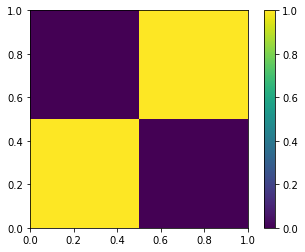

In [7]:
from IPython.core.display import display
from IPython.core.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
def GetTargetValue(x, y): # both x, y : 0 <= x,y <= 1
    res = (x >= 0.5) ^ (y >= 0.5)
    res_int = 0
    if (res):
        res_int = 1
    return(res_int)

# plot the TargetValue function
x_y = []; target = []
for ix in xrange(50):
    for iy in xrange(50):
        x_y.append([ix/50., iy/50.]); target.append(GetTargetValue(x_y[-1][0], x_y[-1][1]))
target = np.array(target).reshape(50,50)

plt.imshow(target, interpolation='none', extent=[0,1., 0, 1.]); plt.colorbar();
plt.show()

The above example (XOR plot) constitutes some interaction pattern which is hard to learn for some machine learning methods.
Let's see how different machine learning methods can learn this structure:

1: Support Vector Machine (here - from the Scikit-Learn package)

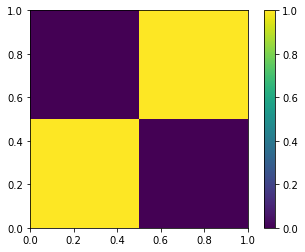

In [8]:
from sklearn import svm

target_linear = target.reshape((1, target.shape[0]*target.shape[1])).tolist()[0]

clf = svm.SVC()
clf.fit(x_y, target_linear) 

pred_svm = np.array(clf.predict(x_y)).reshape(50,50)
plt.imshow(pred_svm, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); plt.show()

As can be seen above - the SVM was able to perfectly learn the pattern offered. Support vector machines are very well suited to capture such non-linear interaction effects.

I will show this aspect for further machine learning methodologies discussed in the pitch document.

2: Linear models / Logit. 

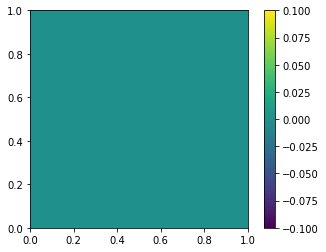

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_y, target_linear) 

pred_logit = np.array(clf.predict(x_y)).reshape(50,50)
plt.imshow(pred_logit, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); plt.show()

Not surprisingly - the logit-model was not able to learn anything.

3: Neural Network (using Google's TensorFlow package) - FOLLOWS LATER IF DESIRED

4: FF Neuroal Network from PyBrain with one intermediate layer. As will be seen - the more iterations - the better the representation. Training takes an incredible amount of time...

from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 25, 1) # was 60 statt 20
from pybrain.datasets import SupervisedDataSet
ds = SupervisedDataSet(2, 1)

for i in xrange(len(x_y)):
    ds.addSample(x_y[i], target_linear[i])

def train_for_epochs(epochs):
    trainer = BackpropTrainer(net, ds, learningrate=0.005)
    trainer.trainUntilConvergence(maxEpochs = epochs, validationProportion=0.003)
    pred_net = []
    for i in xrange(len(x_y)):
        pred_net.append(net.activate(x_y[i]))
    
    pred_net = np.array(pred_net).reshape(50,50)
    plt.imshow(pred_net, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); 

#ax1 = plt.subplot(321)
#train_for_epochs(5)   
#ax2 = plt.subplot(322)
#train_for_epochs(20)
#ax3 = plt.subplot(323)
#train_for_epochs(100)
#ax4 = plt.subplot(324)
#train_for_epochs(200)
#ax5 = plt.subplot(325)
#train_for_epochs(400)
#ax6 = plt.subplot(326)
train_for_epochs(500)
plt.show()

In [10]:
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 60, 1)
from pybrain.datasets import SupervisedDataSet
ds = SupervisedDataSet(2, 1)

for i in xrange(len(x_y)):
    ds.addSample(x_y[i], target_linear[i])

def train_for_epochs(epochs):
    trainer = BackpropTrainer(net, ds)
    trainer.trainUntilConvergence(maxEpochs = epochs, validationProportion=0.01)
    pred_net = []
    for i in xrange(len(x_y)):
        pred_net.append(net.activate(x_y[i]))
    
    pred_net = np.array(pred_net).reshape(50,50)
    plt.imshow(pred_net, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); 

#ax1 = plt.subplot(321)
train_for_epochs(5)   
#ax2 = plt.subplot(322)
#train_for_epochs(20)
#ax3 = plt.subplot(323)
#train_for_epochs(100)
#ax4 = plt.subplot(324)
#train_for_epochs(200)
#ax5 = plt.subplot(325)
#train_for_epochs(400)
#ax6 = plt.subplot(326)
#train_for_epochs(8000)
#plt.show()

Now using the Neural Network Classification provided by scikit learn:

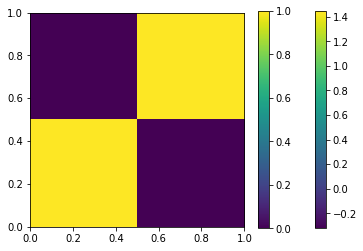

In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 2), random_state=1)
clf.fit(x_y, target_linear) 

pred_svm = np.array(clf.predict(x_y)).reshape(50,50)
plt.imshow(pred_svm, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); plt.show()

5: Using random forests (again - perfect fit!):

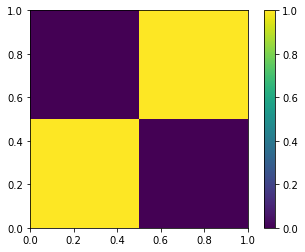

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1)
rfc.fit(x_y, target_linear)

pred_rfc = np.array(rfc.predict(x_y)).reshape(50,50)
plt.imshow(pred_rfc, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); plt.show()

6: Using gradient boosting:

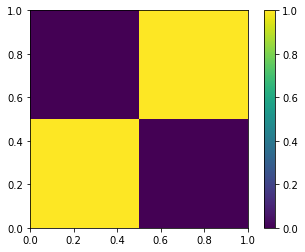

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(x_y, target_linear)

pred_gbc = np.array(gbc.predict(x_y)).reshape(50,50)
plt.imshow(pred_gbc, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.colorbar(); plt.show()

Unsupervised learning does not seem to be appropriate for that kind of data...

Using some self-developed 2d preprocessing:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import scipy.stats

execfile("./2d_prepro.py")

feature_inputs      = {}
feature_inputs['x'] = continuous_delta_prp
feature_inputs['y'] = continuous_delta_prp

df = pd.DataFrame(x_y)
df.columns = ['x', 'y']

my2dPrepro = Add2dVariables(feature_inputs, [('x', 'y')])
my2dPrepro.fit(X = df, y = np.array(target_linear))
df['2dinput'] = my2dPrepro.transform(X = df)


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(df, target_linear) 

pred_logit2d = np.array(lr.predict(df)).reshape(50,50)
plt.imshow(pred_logit2d, interpolation = 'none', extent = [0, 1., 0, 1.]); plt.show()

IOError: [Errno 2] No such file or directory: './2d_prepro.py'

**The above shows how using 2d-preprocessing the logistic regression can be used to generate the XOR-pattern again!!!**
We retain inference - but the preprocessing is not trivial! We have to discuss the details.

**In the following - I will use market data to simulate PD data - namely intraday Forex data with minutes resolution**

We load the **CreditCard Clients Data**:

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
# Loading CreditCard Data
import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing
import numpy as np

#df = pd.read_csv('/home/pascal/Dokumente/Fintegral/CreditCardClients.csv')
df = pd.read_csv(r'c:\users\pascal\Desktop\ML\HSBC\CreditCardClients.csv')

subplot(121)
hist(df['LIMIT_BAL'])
plt.ylabel('LIMIT_BAL');  
subplot(122)
hist(df['EDUCATION'])
plt.ylabel('EDUCATION');  
plt.show()

subplot(121)
hist(df['AGE'])
plt.ylabel('AGE');  
subplot(122)
hist(df['default payment next month'])
plt.ylabel('default payment next month (Target)');  
plt.show()

df['target']     = df['default payment next month']

nr_train_samples = 25000

df['rel_credit_usage_p1']  = df['BILL_AMT1'] / df['LIMIT_BAL']
df['rel_credit_usage_p2']  = df['BILL_AMT2'] / df['LIMIT_BAL']
df['rel_credit_usage_p3']  = df['BILL_AMT3'] / df['LIMIT_BAL']
df['rel_credit_usage_p4']  = df['BILL_AMT4'] / df['LIMIT_BAL']
df['rel_credit_usage_p5']  = df['BILL_AMT5'] / df['LIMIT_BAL']
df['rel_credit_usage_p6']  = df['BILL_AMT6'] / df['LIMIT_BAL']
df['sum_rel_credit_usage'] = df['rel_credit_usage_p1'] + df['rel_credit_usage_p2'] + df['rel_credit_usage_p3'] + df['rel_credit_usage_p4'] + df['rel_credit_usage_p5'] + df['rel_credit_usage_p6']
#df_aug['max_rel_credit_usage_3'] =  APPLY ON THREE ROWS
#df_aug['max_rel_credit_usage_6'] =  APPLY ON SIX ROWS
df['rel_pay_amt1']   = df['PAY_AMT1']  / df['BILL_AMT1']
df['rel_bill_pay_1'] = df['BILL_AMT2'] / df['PAY_AMT1']
df['rel_bill_pay_2'] = df['BILL_AMT3'] / df['PAY_AMT2']
df['rel_bill_pay_3'] = df['BILL_AMT4'] / df['PAY_AMT3']
df['rel_bill_pay_4'] = df['BILL_AMT5'] / df['PAY_AMT4']

df['rel_bill_pay_1t4'] = df['rel_bill_pay_1'] + df['rel_bill_pay_2'] + df['rel_bill_pay_3'] + df['rel_bill_pay_4']

df = df.replace([np.nan, -np.inf, np.inf], -999)

X                = df.copy()

del X['default payment next month']
del X['ID']
del X['target']

scaler           = preprocessing.StandardScaler().fit(X);
X_scaled         = scaler.transform(X);

X_train          = X.iloc[0:nr_train_samples]
X_pred           = X.iloc[nr_train_samples: ]
df_train         = df.iloc[0:nr_train_samples]
df_pred          = df.iloc[nr_train_samples: ]
target_train     = df['target'].iloc[0:nr_train_samples].copy()
target_pred      = df['target'].iloc[nr_train_samples: ].copy()
target           = df['target'].iloc[nr_train_samples: ].copy()

scaler           = preprocessing.StandardScaler().fit(X_train);
X_train_scaled   = scaler.transform(X_train);
X_pred_scaled    = scaler.transform(X_pred);


print("--- correlation with PAY_AMT2 ---")
print np.corrcoef(df['BILL_AMT5'], df['PAY_AMT2'])[0][1]
print np.corrcoef(df['BILL_AMT4'], df['PAY_AMT2'])[0][1]
print np.corrcoef(df['BILL_AMT3'], df['PAY_AMT2'])[0][1]#best
print np.corrcoef(df['BILL_AMT2'], df['PAY_AMT2'])[0][1]
print np.corrcoef(df['BILL_AMT1'], df['PAY_AMT2'])[0][1]

print("--- correlation with PAY_AMT3 ---")
print np.corrcoef(df['BILL_AMT5'], df['PAY_AMT3'])[0][1]
print np.corrcoef(df['BILL_AMT4'], df['PAY_AMT3'])[0][1]#best
print np.corrcoef(df['BILL_AMT3'], df['PAY_AMT3'])[0][1]
print np.corrcoef(df['BILL_AMT2'], df['PAY_AMT3'])[0][1]
print np.corrcoef(df['BILL_AMT1'], df['PAY_AMT3'])[0][1]



print df.columns

# Code for the creation of profile plots
def Profile(x,y,nbins,xmin,xmax):
    df_ = DataFrame({'x' : x , 'y' : y})

    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    
    df_['bin'] = np.digitize(df_['x'],binedges)
    df_['bin'] = df_['bin'].apply(lambda x: x if x <= nbins else nbins)

    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df_['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    
    bins = ProfileFrame.index.values
    
    for bin in bins: #[1,2,3,4,5,...]
        ProfileFrame.ix[bin,'ymean'] = df_.ix[df_['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev'] = df_.ix[df_['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])
    

    errorbar(ProfileFrame['bincenters'].values, ProfileFrame['ymean'].values, yerr=ProfileFrame['yMeanError'].values, xerr=(xmax-xmin)/(2*nbins), fmt=".") 
    return

In [ ]:
# Here the SVM-SVC Code starts. We do NOT include GridSearchCV YET
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

clf         = svm.SVC(kernel = 'rbf', max_iter = -1, probability = True, class_weight = 'balanced', shrinking = True, cache_size = 4000) # Cache size 4 GB
clf.fit(X_scaled, df['target'])

pred_svc_is = clf.predict_proba(X_scaled)

proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, df['target'].values, 10, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()


roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = df['target'].values, y_pred = proba_1_is)
print("ROC_auc = %g" % roc_auc) #, AR = %g" % (roc_auc, AR))

That looks pretty promising - but is still **In-Sample**!

Let's go Out-of-Sample instead...:

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

clf              = svm.SVC(kernel = 'rbf', max_iter = -1, probability = True, class_weight = 'balanced', shrinking = True, cache_size = 4000, C = 1.0)
clf.fit(X_train_scaled, target_train)

pred_svc_is     = clf.predict_proba(X_train_scaled)
pred_svc_oos    = clf.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, target_train, 10, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 10, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = metrics.accuracy_score(y_true = target_pred, y_score = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Let's go for an optimization of the fit parameters:

In [ ]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array')

param_grid      = dict(C=[0.1, 0.5, 1., 2.0, 4.0])
clf             = svm.SVC(kernel = 'rbf', max_iter = -1, probability = True, class_weight = 'balanced', shrinking = True, cache_size = 1000)
grid_search     = GridSearchCV(clf, param_grid = param_grid, verbose = 1, n_jobs = 6, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)

clf             = grid_search.best_estimator_

pred_is     = clf.predict_proba(X_train_scaled)
pred_oos    = clf.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, target_train, 10, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 10, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Next - let's check the same for Random forests:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators = 1600, n_jobs = -1, class_weight = "balanced_subsample", max_depth = 8)
rfc.fit(X_train_scaled, target_train)

pred_svc_is     = rfc.predict_proba(X_train_scaled)
pred_svc_oos    = rfc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 10, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 10, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

That looks **pretty promising**!!!!

Let's optimize the predictor...:

In [ ]:
from sklearn.ensemble    import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

param_grid      = dict(n_estimators=[100, 200, 400, 800, 1600], max_depth=[3, 4, 5, 6, 7, 8, 9])
rfc             = RandomForestClassifier(n_jobs = -1, class_weight = "balanced_subsample")
grid_search     = GridSearchCV(rfc, param_grid = param_grid, verbose = 1, n_jobs = 1, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)

rfc             = grid_search.best_estimator_

pred_svc_is     = rfc.predict_proba(X_train_scaled)
pred_svc_oos    = rfc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

**THAT** looks pretty **GOOD!** - That's **really pretty GOOD!**

Now, let's go after **Grading Boosting** - first without optimization:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 400, max_depth = 5, learning_rate = 0.01, )

gbc.fit(X_train_scaled, target_train)

pred_is     = gbc.predict_proba(X_train_scaled)
pred_oos    = gbc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Using the Scikit-Learn Neural Network:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics        import roc_auc_score

net = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter = 500, hidden_layer_sizes=(25, 2), random_state=1)

net.fit(X_train_scaled, target_train)

pred_is     = net.predict_proba(X_train_scaled)
pred_oos    = net.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))
    

That looks pretty good as well. Now again - let's optimize the parameters for the Neural Network:

In [ ]:
### Classifier Neural Network optimization
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array') # this is a known issue related to joblib

gbc             = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)

param_grid      = dict(max_iter = [50, 100, 170, 250, 500, 1000], hidden_layer_sizes = [(7,3), (10, 2), (14,2), (25, 2), (50, 2)], alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 10, 1000])
grid_search     = GridSearchCV(gbc, param_grid = param_grid, verbose = 1, n_jobs = 8, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)
gbc             = grid_search.best_estimator_

pred_svc_is     = gbc.predict_proba(X_train_scaled)
pred_svc_oos    = gbc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array') # this is a known issue related to joblib

gbc             = GradientBoostingClassifier()

param_grid      = dict(learning_rate = [0.005, 0.01, 0.02, 0.05, 0.1], n_estimators = [50, 100, 200, 400, 1000], max_depth = [3, 4, 5, 6, 7])
grid_search     = GridSearchCV(gbc, param_grid = param_grid, verbose = 1, n_jobs = 8, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)
gbc             = grid_search.best_estimator_

pred_svc_is     = gbc.predict_proba(X_train_scaled)
pred_svc_oos    = gbc.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_svc_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_svc_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
ax2.set_ylim([-0.1, 1.1])
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

The above performance looks also **very good**!

One could think of combining the GradientBoostingClassifier with the random-forest one...(!)


Finally - **logistic regression**:

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight = 'balanced')
clf.fit(X_train_scaled, target_train)

pred_is     = clf.predict_proba(X_train_scaled)
pred_oos    = clf.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()
# I don't understand that IS profile plot!!!!! ######

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Could look better...

Again - using the optimization:

In [ ]:
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array') # this is a known issue related to joblib

clf = LogisticRegression(class_weight = 'balanced')

param_grid      = dict(C = [0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0])
grid_search     = GridSearchCV(clf, param_grid = param_grid, verbose = 1, n_jobs = 1, scoring = 'roc_auc') # We optimize for ROC area under curve

grid_search.fit(X_train_scaled, target_train)
print(grid_search.best_estimator_)

clf             = grid_search.best_estimator_

pred_svc_is     = clf.predict_proba(X_train_scaled)
pred_svc_oos    = clf.predict_proba(X_pred_scaled ) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])    
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()
# I don't understand that IS profile plot!!!!! ######

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Now that we have seen the performance of **logistic regression** - let's combine that with the **2D preprocessing**:

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
execfile("./2d_prepro.py")

feature_inputs              = {}
feature_inputs['LIMIT_BAL'] = continuous
feature_inputs['SEX']       = discrete
feature_inputs['EDUCATION'] = discrete
feature_inputs['MARRIAGE']  = discrete
feature_inputs['AGE']       = continuous
feature_inputs['PAY_0']     = discrete
feature_inputs['PAY_2']     = discrete
feature_inputs['PAY_3']     = discrete
feature_inputs['PAY_4']     = discrete
feature_inputs['PAY_5']     = discrete
feature_inputs['PAY_6']     = discrete
feature_inputs['PAY_AMT1']  = continuous
feature_inputs['PAY_AMT2']  = continuous
feature_inputs['PAY_AMT3']  = continuous


my2dPrepro       = Add2dVariables(feature_inputs, [('SEX', 'EDUCATION'), ('MARRIAGE', 'EDUCATION'), ('MARRIAGE', 'AGE'), ('EDUCATION', 'AGE'), ('PAY_4', 'PAY_5'), ('PAY_5', 'PAY_6')], plot = True)
my2dPrepro.fit(X = df_train, y = np.array(target_train))
df_train_2d      = df_train.merge(                        my2dPrepro.transform(X = df_train), left_index = True, right_index = True)
df_pred_2d       = df_pred.reset_index(drop = True).merge(my2dPrepro.transform(X = df_pred ), left_index = True, right_index = True)


del df_train_2d['ID']
del df_train_2d['target']
del df_train_2d['default payment next month']
del df_pred_2d['ID']
del df_pred_2d['target']
del df_pred_2d['default payment next month']

scaler2           = preprocessing.StandardScaler().fit(df_train_2d);
X_train_scaled2   = scaler2.transform(df_train_2d);
X_pred_scaled2    = scaler2.transform(df_pred_2d);

clf = LogisticRegression(class_weight = 'balanced')
clf.fit(X_train_scaled2, target_train)

print(clf.coef_)

pred_is     = clf.predict_proba(X_train_scaled2)
pred_oos    = clf.predict_proba(X_pred_scaled2) 

# now the visualization...:
proba_1_is  = []
for is_event in pred_is:
    proba_1_is.append(is_event[1])

proba_1_oos  = []
for oos_event in pred_oos:
    proba_1_oos.append(oos_event[1])    

    
# TODO: Show the underlying 2D features
    
ax1 = subplot(211)
hist(proba_1_is, bins = 50)
ax1.set_title('IS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_is, target_train, 20, min(proba_1_is), max(proba_1_is))
ax2.set_title('IS Profile Plot')
plt.show()
# I don't understand that IS profile plot!!!!! ######

ax1 = subplot(211)
hist(proba_1_oos, bins = 50)
ax1.set_title('OOS Histogram of Predictions')
plt.show()
ax2 = subplot(212)
Profile(proba_1_oos, target_pred, 20, min(proba_1_oos), max(proba_1_oos))
ax2.set_title('OOS Profile Plot')
plt.show()

roc_auc = roc_auc_score(y_true = target_pred, y_score = proba_1_oos)
#AR      = accuracy_score(y_true = target_pred, y_pred = proba_1_oos)
print("ROC_auc = %g, AR = ?" % (roc_auc))

Neural Networks. As it turned out, PyBrain is by far too slow. So I do that task using Google's  again using PyBrain:

In [ ]:
import time
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.datasets            import SupervisedDataSet

net = buildNetwork(23, 100, 1)
ds  = SupervisedDataSet(23, 1)

for i in xrange(len(X_train)):
    ds.addSample(X_train.iloc[i], target_train[i])

def train_for_epochs_is_oos(epochs):
    start = time.time()
    trainer = BackpropTrainer(net, ds)
    trainer.trainUntilConvergence(maxEpochs = epochs, validationProportion=0.01)
    stop  = time.time()
    print("It took %g seconds to train for epochs = %ld" % (stop - start, epochs))
    pred_net_is  = []
    pred_net_oos = []
    for i in xrange(len(X_train)):
        pred_net_is.append(net.activate(X_train.iloc[i])[0])
        
    for i in xrange(len(X_pred)):
        pred_net_oos.append(net.activate(X_pred.iloc[i])[0])
        
    ax1 = subplot(211)
    hist(pred_net_is, bins = 50)
    ax1.set_title('IS Histogram of Predictions, epochs = %ld' % epochs)
    
    ax2 = subplot(212)
    Profile(pred_net_is, target_train, 10, min(pred_net_is), max(pred_net_is))
    ax2.set_title('IS Profile Plot, epochs = %ld' % epochs)
    plt.show()
    
    ax1 = subplot(211)
    hist(pred_net_oos, bins = 50)
    ax1.set_title('OOS Histogram of Predictions, epochs = %ld' % epochs)
    
    ax2 = subplot(212)
    Profile(pred_net_oos, target_pred, 10, min(pred_net_oos), max(pred_net_oos))
    ax2.set_title('OOS Profile Plot, epochs = %ld' % epochs)
    plt.show()

#train_for_epochs_is_oos(5)  
train_for_epochs_is_oos(2 )
train_for_epochs_is_oos(10)
train_for_epochs_is_oos(200)  # fitting is expected to last an hour
train_for_epochs_is_oos(1700) # fitting is expected to last eight hours  

**TODO**

deep learning

neural network

Dieser berühmte ROC Plot

slides -> slides Kazim